In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import Integral, Symbol

0.0146976849126223


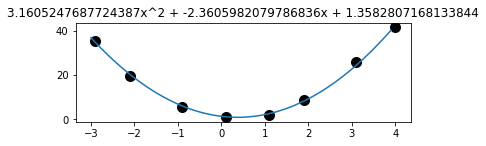

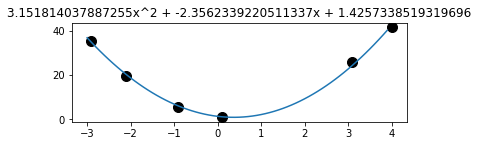

In [2]:
pt = [[-2.9, 35.4],[-2.1, 19.7],[-0.9, 5.7],[0.1, 1.2],[1.1, 2.1],[1.9, 8.7],[3.1, 25.7],[4.0, 41.5]]
x1=[]
y1=[]
for i in range(8):
    x1.append(pt[i][0])
    y1.append(pt[i][1])
a, b, c = np.polyfit(x1, y1, 2)

x3 = []
y3 = []

res_list = []
sam_list = []
for i in range(8):
    for j in range(7):
        pt = [[-2.9, 35.4],[-2.1, 19.7],[-0.9, 5.7],[0.1, 1.2],[1.1, 2.1],[1.9, 8.7],[3.1, 25.7],[4.0, 41.5]]
        if j >= i:
            del pt[i]
            del pt[j]
            sam_list.append(pt)
            #x3.append(pt)
            #y3.append(pt)   
            #a_2, b_2, c_2 = np.polyfit(x3, y3, 2)
            #print(a_, b_, c_)
            
min = [1000, 0]

for i in range(28):
    x2 = []
    y2 = []
    for j in range(6):
        x2.append(sam_list[i][j][0])
        y2.append(sam_list[i][j][1])
    a_, b_, c_ = np.polyfit(x2, y2, 2)
    x = Symbol('x')
    f = (a*x**2 + b*x + c - a_*x**2 - b_*x - c_)**2
    area = Integral(f, (x, -2.9, 4)).doit().evalf()
    if area < min[0]:
        min[0] = area
        min[1] = i
        a_sample = a_
        b_sample = b_
        c_sample = c_
#        print(a, b, c)
#        print(a_, b_, c_)
#        print(area)
print(min[0])

x2 = []
y2 = []
for i in range(6):
    x2.append(sam_list[min[1]][i][0])
    y2.append(sam_list[min[1]][i][1])


fit_x1 = np.arange(-3,4,0.1)
fit_y1 = a*fit_x1**2 + b*fit_x1 + c
plt.subplot(2,1,1)
plt.scatter(x1,y1, c = 'black', s= 100)
plt.plot(fit_x1, fit_y1)
plt.title(f"{a}x^2 + {b}x + {c}")
plt.show()

fit_x2 = np.arange(-3,4,0.1)
fit_y2 = a_sample*fit_x2**2 + b_sample*fit_x2 + c_sample
plt.subplot(2,1,2)
plt.scatter(x2,y2, c = 'black', s= 100)
plt.plot(fit_x2, fit_y2)
plt.title(f"{a_sample}x^2 + {b_sample}x + {c_sample}")

plt.show()

